In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
## TO STACK ALL THE IMAGES IN ONE WINDOW
def stackImages(imgArray,scale,lables=[]):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
            hor_con[x] = np.concatenate(imgArray[x])
        ver = np.vstack(hor)
        ver_con = np.concatenate(hor)
    else:
        for x in range(0, rows):
            imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        hor_con= np.concatenate(imgArray)
        ver = hor
    if len(lables) != 0:
        eachImgWidth= int(ver.shape[1] / cols)
        eachImgHeight = int(ver.shape[0] / rows)
        print(eachImgHeight)
        for d in range(0, rows):
            for c in range (0,cols):
                cv2.rectangle(ver,(c*eachImgWidth,eachImgHeight*d),(c*eachImgWidth+len(lables[d][c])*13+27,30+eachImgHeight*d),(255,255,255),cv2.FILLED)
                cv2.putText(ver,lables[d][c],(eachImgWidth*c+10,eachImgHeight*d+20),cv2.FONT_HERSHEY_COMPLEX,0.7,(255,0,255),2)
    return ver

def reorder(myPoints):

    myPoints = myPoints.reshape((4, 2))
    myPointsNew = np.zeros((4, 1, 2), dtype=np.int32)
    add = myPoints.sum(1)

    myPointsNew[0] = myPoints[np.argmin(add)]
    myPointsNew[3] =myPoints[np.argmax(add)]
    diff = np.diff(myPoints, axis=1)
    myPointsNew[1] =myPoints[np.argmin(diff)]
    myPointsNew[2] = myPoints[np.argmax(diff)]

    return myPointsNew


def biggestContour(contours):
    biggest = np.array([])
    max_area = 0
    for i in contours:
        area = cv2.contourArea(i)
        print("area",area)
        if area > 3000:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.02 * peri, True)
            print("len",len(approx))
            print(area > max_area)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
    return biggest,max_area
def drawRectangle(img,biggest,thickness):
    cv2.line(img, (biggest[0][0][0], biggest[0][0][1]), (biggest[1][0][0], biggest[1][0][1]), (0, 255, 0), thickness)
    cv2.line(img, (biggest[0][0][0], biggest[0][0][1]), (biggest[2][0][0], biggest[2][0][1]), (0, 255, 0), thickness)
    cv2.line(img, (biggest[3][0][0], biggest[3][0][1]), (biggest[2][0][0], biggest[2][0][1]), (0, 255, 0), thickness)
    cv2.line(img, (biggest[3][0][0], biggest[3][0][1]), (biggest[1][0][0], biggest[1][0][1]), (0, 255, 0), thickness)

    return img

def nothing(x):
    pass

def initializeTrackbars(intialTracbarVals=0):
    cv2.namedWindow("Trackbars")
    cv2.resizeWindow("Trackbars", 360, 240)
    cv2.createTrackbar("Threshold1", "Trackbars", 200,255, nothing)
    cv2.createTrackbar("Threshold2", "Trackbars", 200, 255, nothing)


def valTrackbars():
    Threshold1 = cv2.getTrackbarPos("Threshold1", "Trackbars")
    Threshold2 = cv2.getTrackbarPos("Threshold2", "Trackbars")
    src = Threshold1,Threshold2
    return src

imgThreshold
area 365.0
area 1271.0
area 740.5
area 40.0
area 1173.0
area 43283.0
len 12
True
area 789.0
area 36.0
area 1734.0
area 3591.0
len 11
True
area 74.5
area 1046.0
area 543.0
area 437.5
area 16.0
area 606.5
area 1302.5
area 2699.5
area 1705.5
area 8467.0
len 10
True
area 16.0
area 2707.0
area 33659.5
len 13
True
[]
0
0
480


NameError: name 'imgWarpColored' is not defined

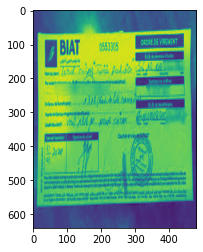

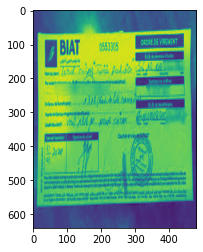

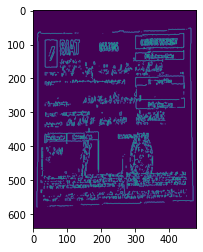

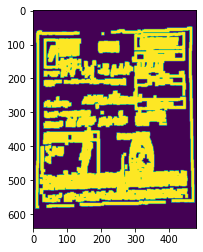

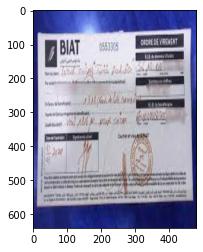

In [2]:
import cv2
import numpy as np
heightImg = 640
widthImg  = 480
########################################################################
path = "C:/Users/Yasmine/Downloads/Handwriting_detection/Documents/ordre biat.jpg"
initializeTrackbars()
count=0

img= cv2.imread(path)
img=cv2.resize(img,(widthImg, heightImg))
imgBlank = np.zeros((heightImg,widthImg, 3), np.uint8)
imgGray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(imgGray)
imgBlur= cv2.GaussianBlur(imgGray,(1,1),1)
plt.figure()
plt.imshow(imgBlur)
thresh=valTrackbars()
imgThreshold=cv2.Canny(imgBlur,thresh[0],thresh[1])
plt.figure()
plt.imshow(imgThreshold)
kernel=np.ones((5,5))
imgDial = cv2.dilate(imgThreshold, kernel, iterations=2)
plt.figure()
plt.imshow(imgDial)
#imgDial =cv2.dilate(imgThreshold, kernel iterations=2)
imgThreshold= cv2.erode(imgDial, kernel, iterations=1)
print("imgThreshold")
plt.figure()
plt.imshow(imgThreshold)
#find All contours
imgContours=img.copy()
imgBigContours=img.copy()
contours, hierarchy =cv2.findContours(imgThreshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imgContours, contours, -1, (0,255,0),10)


#Find the biggest contour
biggest,maxArea=biggestContour(contours)
print(biggest)
print(maxArea)
print(biggest.size)
if biggest.size!=0:
    biggest=reorder(biggest)
    cv2.drawContours(imgBigContours, biggest,-1, (0,255,0),20)
    imgBigContour=drawRectangle(imgBigContours,biggest,2)
    pts1=np.float32(biggest)
    pts2=np.float32([[0,0],[widthImg,0], [0,heightImg],[widthImg,heightImg]])
    matrix=cv2.getPerspectiveTransform(pts1,pts2)
    imgWarpColored= cv2.warpPerspective(img,matrix,(widthImg,heightImg))

    #Remove 20 pixels from each side
    imgWarpColored=imgWarpColored[20:imgWarpColored.shape[0]-20, 20:imgWarpColored.shape[1]-20]
    imgWarpColored=cv2.resize(imgWarpColored,(widthImg,heightImg))
    #Aapply adaptive threshold
    imgWarpGray=cv2.cvtColor(imgWarpColored,cv2.COLOR_BGR2GRAY)
    imgAdaptiveThre=cv2.adaptiveThreshold(imgWarpGray, 255,1,1,7,2)
    imgAdaptiveThre=cv2.bitwise_not(imgAdaptiveThre)
    imgAdaptiveThre=cv2.medianBlur(imgAdaptiveThre,3)
    imageArray=([img,imgGray,imgBlur,imgBlank],
               [imgBlank,imgBlank,imgBlank,imgBlank])
else:
    imageArray=([img,imgGray,imgThreshold,imgContours],
               [imgBlank,imgBlank,imgBlank,imgBlank])
#print("imgBigContours")    
plt.imshow(imgBigContours)   
lables=[["original","gray","threshold","Contours"],
       "Biggest Contour", "Warp Perspective", "Warp Gray", "Adaptive Threshold"]
stackedImage = stackImages(imageArray,0.75,lables)
#cv2.imshow("Result",stackedImage)
#Save image when 's' key is pressed
cv2.imwrite("C:/Users/Yasmine/Downloads/Handwriting_detection/Scanned/myImage"+str(count)+".jpg",imgWarpColored)
cv2.rectangle(stackedImage, ((int(stackedImage.shape[1] / 2) - 230), int(stackedImage.shape[0] / 2) + 50),
                      (1100, 350), (0, 255, 0), cv2.FILLED)
cv2.putText(stackedImage, "Scan Saved", (int(stackedImage.shape[1] / 2) - 200, int(stackedImage.shape[0] / 2)),
                    cv2.FONT_HERSHEY_DUPLEX, 3, (0, 0, 255), 5, cv2.LINE_AA)
#cv2.imshow("Result", stackedImage)
#cv2.waitKey(300)
count +=1

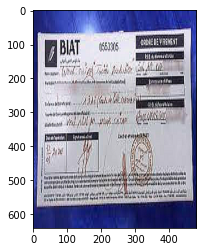

In [3]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv2.filter2D(img, -1, kernel)
plt.imshow(im)


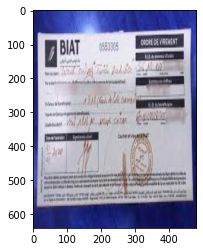

In [18]:
import cv2

#initializing
img = cv2.imread("C:/Users/Yasmine/Downloads/Handwriting_detection/Documents/ordre biat.jpg")
img = cv2.resize(img, (int(480*2), int(640*2)))
# write code here
GrayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
BlurredFrame = cv2.GaussianBlur(GrayImg, (5, 5), 1)
CannyFrame = cv2.Canny(BlurredFrame, 190, 190)
contours, _ = cv2.findContours(CannyFrame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
ContourFrame = img.copy()
ContourFrame = cv2.drawContours(ContourFrame, contours, -1, (255, 0, 255), 4)
CornerFrame = img.copy()
maxArea = 0
biggest = []
for i in contours :
    area = cv2.contourArea(i)
    if area > 500 :
        peri = cv2.arcLength(i, True)
        edges = cv2.approxPolyDP(i, 0.02*peri, True)
        if area > maxArea and len(edges) == 4 :
            biggest = edges
            maxArea = area
if len(biggest) != 0 :
    biggest=reorder(biggest)
    CornerFrame = cv2.drawContours(CornerFrame, biggest,-1, (0,255,0),20)
    CornerFrame=drawRectangle(CornerFrame,biggest,2)
    #CornerFrame = cv2.drawContours(CornerFrame, biggest, -1, (255, 0, 255), 25)
# resizing
img = cv2.resize(img, (480, 640))
GrayImg = cv2.resize(GrayImg, (480, 640))
BlurredFrame = cv2.resize(BlurredFrame, (480, 640))
CannyFrame = cv2.resize(CannyFrame, (480, 640))
ContourFrame = cv2.resize(ContourFrame, (480, 640))
CornerFrame = cv2.resize(CornerFrame, (480, 640))

#displaying
#cv2.imshow("img", img)
#cv2.imshow("GrayImg", GrayImg)
#cv2.imshow("BlurredFrame", BlurredFrame)
#cv2.imshow("CannyFrame", CannyFrame)
#cv2.imshow("ContourFrame", ContourFrame)
#cv2.imshow("CornerFrame", CornerFrame)
#cv2.waitKey(0)
plt.imshow(CornerFrame)